In [71]:
#Dependencies
import os
import numpy as np
import tensorflow as tf
import PIL
import pandas as pd

import keras 
from keras.preprocessing import image
from keras.models import Model
from keras.models import load_model
from keras.utils import to_categorical
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import (VGG19, preprocess_input, decode_predictions)

from sklearn.model_selection import train_test_split

In [72]:
# Trained Model
model_1 = load_model("Xception_train_b10_ep100_SGD.h5")
model_2 = load_model("Xception_train_b10_ep200_SGD.h5")

In [73]:
test_batch = 'images_split/test'

In [74]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

test_batches = test_datagen.flow_from_directory(
                                directory=test_batch,
                                target_size=(224,224),  
                                classes=['animals','beaches','birds','electronics','fashion','nature','landmarks','people'],                           
                                batch_size=5
                                )       

Found 374 images belonging to 8 classes.


In [75]:
predictions_1 = model_1.predict_generator(test_batches, 10)
predictions_2 = model_2.predict_generator(test_batches, 10)

In [76]:
predictions_1
predictions_2

array([[  2.79258711e-05,   7.25504826e-04,   8.48835407e-05,
          2.90149328e-04,   5.33336599e-04,   9.99840675e-04,
          5.97344013e-04,   9.96740997e-01],
       [  3.27589805e-06,   2.43482646e-04,   1.53016697e-06,
          4.19591152e-06,   5.64471384e-06,   9.92576778e-01,
          7.11600622e-03,   4.89866652e-05],
       [  9.68228519e-01,   2.05774428e-04,   5.96797800e-05,
          5.87139839e-05,   1.13010115e-04,   1.25749856e-02,
          1.87394526e-02,   1.98320668e-05],
       [  2.35632896e-07,   4.99396037e-07,   9.93896254e-09,
          2.69081344e-08,   9.51836867e-08,   9.99998450e-01,
          4.46801010e-07,   2.37285619e-07],
       [  9.98676717e-01,   1.63398672e-05,   1.37590241e-05,
          1.93837741e-06,   9.40427617e-06,   8.91969539e-05,
          1.18947879e-03,   3.16086243e-06],
       [  9.99910235e-01,   9.66560719e-07,   2.24587893e-06,
          2.40535627e-07,   3.97001941e-07,   2.05704164e-05,
          6.47119232e-05,   5.5

In [77]:
#plot the average of accuray for each 
import matplotlib.pyplot as plt
import seaborn as sns

classes = ['animals','beaches','birds','electronics','fashion','nature','landmarks','people']

df1 = pd.DataFrame(data = predictions_1[0:,0:], columns = classes)
df2 = pd.DataFrame(data = predictions_2[0:,0:], columns = classes)

means1 = df1.mean()
errors1 = df1.std()

means2 = df2.mean()
errors2 = df2.std()

d1 = {'Mean_Accuracy': means1, 'Standard_Deviation': errors1}
table_df1 = pd.DataFrame(data=d1, index=classes)
table_df1

,Mean_Accuracy,Standard_Deviation
animals,0.179582,0.366519
beaches,0.066115,0.238494
birds,0.021237,0.140428
electronics,0.149267,0.348975
fashion,0.124360,0.286182
nature,0.186483,0.345229
landmarks,0.128775,0.318067
people,0.144180,0.292160


In [78]:
d2 = {'Mean_Accuracy': means2, 'Standard_Deviation': errors2}
table_df2 = pd.DataFrame(data=d2, index=classes)
table_df2

,Mean_Accuracy,Standard_Deviation
animals,0.190823,0.374113
beaches,0.064133,0.238384
birds,0.021024,0.140877
electronics,0.144280,0.348792
fashion,0.130608,0.291530
nature,0.192032,0.357739
landmarks,0.119491,0.304205
people,0.137609,0.283230


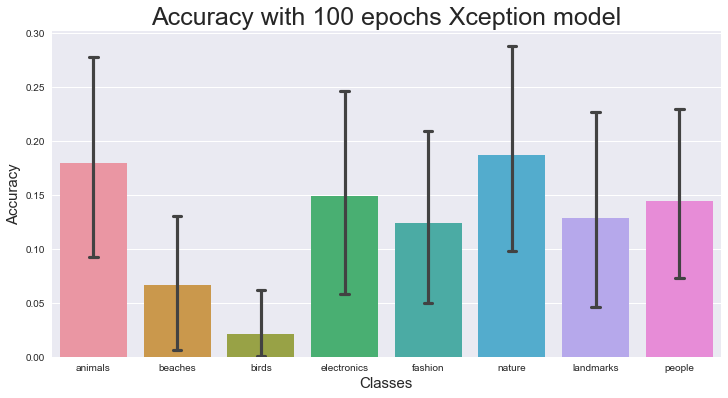

In [111]:
plt.figure(figsize=(12,6)) 
fig1 = sns.barplot(data=df1, capsize=.1) 
plt.xlabel("Classes", fontsize=15) 
plt.ylabel("Accuracy", fontsize=15) 
plt.title("Accuracy with 100 epochs Xception model", fontsize=25) 
plt.savefig('100ep_Xception.png')
plt.show(fig1)


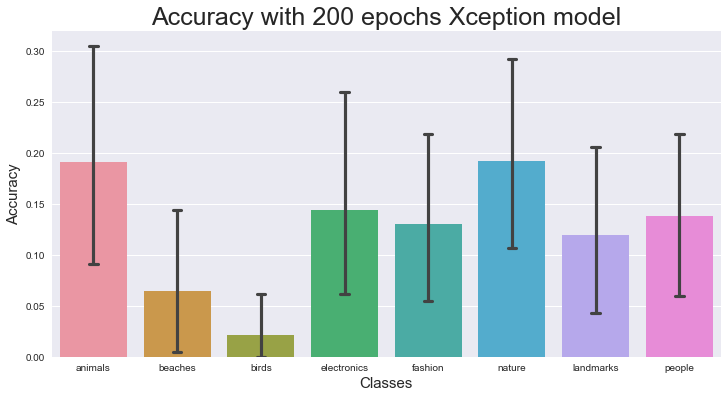

In [112]:
plt.figure(figsize=(12,6)) 
fig2 = sns.barplot(data=df2, capsize=.1) 
plt.xlabel("Classes", fontsize=15) 
plt.ylabel("Accuracy", fontsize=15) 
plt.title("Accuracy with 200 epochs Xception model", fontsize=25) 
plt.savefig('200ep_Xception.png')
plt.show(fig2)

In [113]:
d3 = {'Class': classes, '100 epochs': means1, '200 epochs': means2}
df3 = pd.DataFrame(data=d3)
df3

,100 epochs,200 epochs,Class
animals,0.179582,0.190823,animals
beaches,0.066115,0.064133,beaches
birds,0.021237,0.021024,birds
electronics,0.149267,0.144280,electronics
fashion,0.124360,0.130608,fashion
nature,0.186483,0.192032,nature
landmarks,0.128775,0.119491,landmarks
people,0.144180,0.137609,people


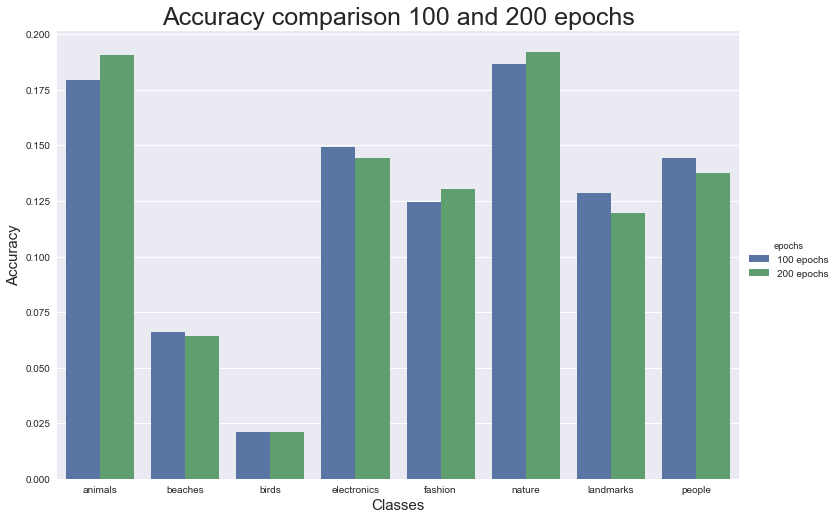

In [114]:
df = pd.melt(df3, id_vars="Class", var_name="epochs", value_name="Accuracy")
plt.figure(figsize=(12,6))
sns.factorplot(x='Class', y='Accuracy', hue='epochs', data=df, kind='bar',size=7, aspect=1.5)
plt.xlabel("Classes", fontsize=15) 
plt.ylabel("Accuracy", fontsize=15) 
plt.title("Accuracy comparison 100 and 200 epochs", fontsize=25) 
plt.savefig('Comparison_Xception_ep.png')
plt.show()